<a href="https://colab.research.google.com/github/SaiSuvamPatnaik/NLP-in-Pytorch/blob/main/NLP_IN_PYTORCH_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Creating Custom Embedding layer

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

In [ ]:
str1 = "I am Sai Suvam"
idx = {"I":0,"am":1,"Sai":2,"Suvam":3}
words = str1.split()
res = [idx[i] for i in words]
print(res)

[0, 1, 2, 3]


In [ ]:
emb = nn.Embedding(len(res),5)
res1 = torch.tensor(res,dtype=torch.long)
emb(res1)

tensor([[-0.6644, -0.6022, -0.3188,  0.0688,  1.3071],
        [-1.5990, -0.9050, -0.3704, -1.6161,  0.2591],
        [-1.2532, -2.1773, -1.1917,  0.4732, -0.4044],
        [-0.4601,  1.0004,  1.0516,  1.6927, -1.1280]],
       grad_fn=<EmbeddingBackward0>)

In [ ]:
print(sum(emb(res1)))

tensor([-3.9767, -2.6840, -0.8293,  0.6185,  0.0338], grad_fn=<AddBackward0>)


### Using pre trained word2vec from gensim library

In [ ]:
import gensim

In [ ]:
review_text = "Other useful internals in Gensim 4.0+ include model.wv.index_to_key, a plain list of the key (word) in each index position, and model.wv.key_to_index, a plain dict mapping keys (words) to their index positions. In pre-4.0 versions, the vocabulary was in the vocab field of the Word2Vec model's wv property, as a dictionary, with the keys being each token (word). So there it was just the usual Python for getting a dictionary's length:"
prc = gensim.utils.simple_preprocess(review_text)


In [ ]:
model = gensim.models.Word2Vec(
    window=3,
    min_count=2,
    workers=4,
)

In [ ]:
model.build_vocab([prc])

In [ ]:
model.wv.vocab

{'dictionary': <gensim.models.keyedvectors.Vocab at 0x7feb68dab610>,
 'each': <gensim.models.keyedvectors.Vocab at 0x7feb68dab950>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7feb68d4f9d0>,
 'index': <gensim.models.keyedvectors.Vocab at 0x7feb68d4f0d0>,
 'keys': <gensim.models.keyedvectors.Vocab at 0x7feb68dab550>,
 'model': <gensim.models.keyedvectors.Vocab at 0x7feb68d4f7d0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7feb68d4f490>,
 'plain': <gensim.models.keyedvectors.Vocab at 0x7feb68d4f450>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7feb68dabbd0>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7feb68dab490>,
 'word': <gensim.models.keyedvectors.Vocab at 0x7feb68dabd10>,
 'wv': <gensim.models.keyedvectors.Vocab at 0x7feb68d4f990>}

In [ ]:
model.train([prc], total_examples=model.corpus_count, epochs=model.epochs)

(23, 350)

In [ ]:
model.save("./trial.model")

In [ ]:
model.wv.similarity(w1="index", w2="word")

-0.08971252

### Load External Vocabulary and analyse using Gensim

In [ ]:
import gensim.downloader as api
from gensim.model import KeyedVectors


In [ ]:
mod = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
mod.most_similar(positive=["king","women"],negative=["men"])

[('queen', 0.74156653881073),
 ('monarch', 0.7021745443344116),
 ('prince', 0.6327081918716431),
 ('kingdom', 0.6294623613357544),
 ('elizabeth', 0.6115030646324158),
 ('throne', 0.6069279909133911),
 ('emperor', 0.5794594287872314),
 ('father', 0.567244291305542),
 ('son', 0.5642266273498535),
 ('margaret', 0.5641614198684692)]

In [ ]:
mod.vectors[0].shape

(100,)

### PreProcessing in NLP (Tensorflow Trial)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ["I want to go out.",
             " I like to play.",
             " No eating - ",
             "No play!",
            ]
tokenizer = Tokenizer(num_words=100, lower= 1, oov_token="<OOV>")

# tokenizer = Tokenizer(num_words=100, lower= 1)

tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'to': 2, 'play': 3, 'no': 4, 'want': 5, 'go': 6, 'out': 7, 'like': 8, 'eating': 9}


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
print(sentences)
print(word_index)
print(sequences)

['I want to go out.', ' I like to play.', ' No eating - ', 'No play!']
{'i': 1, 'to': 2, 'play': 3, 'no': 4, 'want': 5, 'go': 6, 'out': 7, 'like': 8, 'eating': 9}
[[1, 5, 2, 6, 7], [1, 8, 2, 3], [4, 9], [4, 3]]


In [ ]:
pre_pad = pad_sequences(sequences, padding='pre')
print("\nword_index = ", word_index)
print("\nsequences = ", sequences)
print("\npadded_seq = " )
print(pre_pad)


word_index =  {'i': 1, 'to': 2, 'play': 3, 'no': 4, 'want': 5, 'go': 6, 'out': 7, 'like': 8, 'eating': 9}

sequences =  [[1, 5, 2, 6, 7], [1, 8, 2, 3], [4, 9], [4, 3]]

padded_seq = 
[[1 5 2 6 7]
 [1 8 2 3 0]
 [4 9 0 0 0]
 [4 3 0 0 0]]


In [ ]:
prepad_maxlen_pretrunc = pad_sequences(sequences, padding ="pre", maxlen =4, truncating ="pre")
print(prepad_maxlen_pretrunc)

[[5 2 6 7]
 [1 8 2 3]
 [0 0 4 9]
 [0 0 4 3]]


### Creating Custom Vocabulary

In [ ]:
class Vocabulary:
    def __init__(self, name):
        self.name = name
        self.PAD_token = 0   # Used for padding short sentences
        self.SOS_token = 1   # Start-of-sentence token
        self.EOS_token = 2   # End-of-sentence token
        self.word2index = {}
        self.word2count = {}
        self.index2word = {self.PAD_token: "PAD", self.SOS_token: "SOS", self.EOS_token: "EOS"}
        self.num_words = 3
        self.num_sentences = 0
        self.longest_sentence = 0

    def add_word(self, word):
        if word not in self.word2index:
            # First entry of word into vocabulary
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            # Word exists; increase word count
            self.word2count[word] += 1
            
    def add_sentence(self, sentence):
        sentence_len = 0
        for word in sentence.split(' '):
            sentence_len += 1
            self.add_word(word)
        if sentence_len > self.longest_sentence:
            # This is the longest sentence
            self.longest_sentence = sentence_len
        # Count the number of sentences
        self.num_sentences += 1

    def to_word(self, index):
        return self.index2word[index]

    def to_index(self, word):
        return self.word2index[word]

In [ ]:
voc = Vocabulary('test')
print(voc)

In [ ]:
corpus = ["I want to go out.",
             " I like to play.",
             " No eating - ",
             "No play!",
            ]


print(corpus)

['I want to go out.', ' I like to play.', ' No eating - ', 'No play!']


In [ ]:
for sent in corpus:
  voc.add_sentence(sent)
print(voc.word2index)

{'I': 3, 'want': 4, 'to': 5, 'go': 6, 'out.': 7, '': 8, 'like': 9, 'play.': 10, 'No': 11, 'eating': 12, '-': 13, 'play!': 14}


In [ ]:
print('Token 4 corresponds to token:', voc.to_word(4))
print('Token "go" corresponds to index:', voc.to_index('go'))

Token 4 corresponds to token: want
Token "go" corresponds to index: 6


In [ ]:
sen = ""
for word in range(voc.num_words):
    print(voc.to_word(word),end=", ")

PAD, SOS, EOS, I, want, to, go, out., , like, play., No, eating, -, play!, 

In [ ]:
sent_tkns = []
sent_idxs = []
for word in corpus[3].split(' '):
  sent_tkns.append(word)
  sent_idxs.append(voc.to_index(word))
print(sent_tkns)
print(sent_idxs)

['No', 'play!']
[11, 14]


### One Hot Encoding Using CountVectorizer Class from Scikit Learn

In [ ]:
documents = ["I like this movie, it's funny.", 'I hate this movie.', 'This was awesome! I like it.', 'Nice one. I love it.']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents)

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,awesome,funny,hate,like,love,movie,nice
0,0,1,0,1,0,1,0
1,0,0,1,0,0,1,0
2,1,0,0,1,0,0,0
3,0,0,0,0,1,0,1


### Using TF-IDF from Scikit Learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(documents)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,awesome,funny,hate,it,like,love,movie,nice,one,this,was
0,0.000000,0.571848,0.000000,0.365003,0.450852,0.000000,0.450852,0.000000,0.000000,0.365003,0.000000
1,0.000000,0.000000,0.702035,0.000000,0.000000,0.000000,0.553492,0.000000,0.000000,0.448100,0.000000
2,0.539445,0.000000,0.000000,0.344321,0.425305,0.000000,0.000000,0.000000,0.000000,0.344321,0.539445
3,0.000000,0.000000,0.000000,0.345783,0.000000,0.541736,0.000000,0.541736,0.541736,0.000000,0.000000


#Vectorization of Text data

### SkipGram in Pytorch

In [ ]:
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

In [ ]:
tokenized_corpus = [x.split() for x in corpus]
vocabulary = []

for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

print(word2idx)
print(idx2word)
print(vocabulary)

{'he': 0, 'is': 1, 'a': 2, 'king': 3, 'she': 4, 'queen': 5, 'man': 6, 'woman': 7, 'warsaw': 8, 'poland': 9, 'capital': 10, 'berlin': 11, 'germany': 12, 'paris': 13, 'france': 14}
{0: 'he', 1: 'is', 2: 'a', 3: 'king', 4: 'she', 5: 'queen', 6: 'man', 7: 'woman', 8: 'warsaw', 9: 'poland', 10: 'capital', 11: 'berlin', 12: 'germany', 13: 'paris', 14: 'france'}
['he', 'is', 'a', 'king', 'she', 'queen', 'man', 'woman', 'warsaw', 'poland', 'capital', 'berlin', 'germany', 'paris', 'france']


In [ ]:
import numpy as np

window_size = 2
idx_pairs = []

for sentence in tokenized_corpus:                                                         # for each sentence
    indices = [word2idx[word] for word in sentence]
    for center_word_pos in range(len(indices)):                                           # for each word, threated as center word
        for w in range(-window_size, window_size + 1):                                    # for each window position
            context_word_pos = center_word_pos + w                                        # make sure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))
    # print(indices)
    break

idx_pairs = np.array(idx_pairs)                                                           # it will be useful to have this as numpy array
print(tokenized_corpus[0])
for i in idx_pairs:
  print(idx2word[i[0]],idx2word[i[1]])

['he', 'is', 'a', 'king']
he is
he a
is he
is a
is king
a he
a is
a king
king is
king a


In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

In [ ]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

In [ ]:
print(idx_pairs)

[[0 1]
 [0 2]
 [1 0]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 3]
 [3 1]
 [3 2]]


In [ ]:
embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 101
learning_rate = 0.001


for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        # print(x)
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.item()
        loss.backward()
        
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')


Loss at epo 0: 4.091924154758454
Loss at epo 10: 3.9284665405750276
Loss at epo 20: 3.7859984934329987
Loss at epo 30: 3.6624924719333647
Loss at epo 40: 3.555117219686508
Loss at epo 50: 3.460879999399185
Loss at epo 60: 3.37708575129509
Loss at epo 70: 3.301531380414963
Loss at epo 80: 3.232516181468964
Loss at epo 90: 3.1687616646289825
Loss at epo 100: 3.1093174695968626


### Word2Vec in Pytorch

#### CBOW

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [22]:
raw_text = """During my second month of nursing school, our professor gave us a pop quiz.  
I was a conscientious student and had breezed through the questions, until I read the last one: 
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke. 
I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name?  
I handed in my paper, leaving the last question blank.  Before class ended, one student asked if the last question would count toward our quiz grade.  
“Absolutely,” said the professor.  “In your careers you will meet many people. All are significant. They deserve your attention and care, 
even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy.""".split()

In [23]:
CONTEXT_SIZE = 2  
EMDEDDING_DIM = 100

vocab = set(raw_text)
vocab_size = len(vocab)

word_list = list(vocab)

word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}

In [24]:
print(vocab)
print(vocab_size)
print(word_to_ix)
print(ix_to_word)

{'They', 'this', 'all', 'She', 'was', 'student', 'All', 'toward', 'never', 'ended,', 'question', 'name?', '50s,', 'how', 'lesson.', 'forgotten', 'do', 'kind', 'and', 'your', 'through', 'dark-haired', 'until', 'name', 'During', 'attention', 'my', 'second', 'many', 'one:', 'careers', 'first', '“In', 'said', 'questions,', 'a', 'learned', 'pop', 'school,', 'asked', 'school?”', 'blank.', 'the', 'some', 'month', 'several', 'will', 'that', 'if', 'is', 'quiz.', 'cleaning', 'tall,', 'but', 'I’ve', 'read', 'meet', 'grade.', 'would', 'significant.', 'count', 'us', 'Dorothy.', 'quiz', 'class', 'professor', 'her', 'who', 'handed', 'Surely', 'say', 'professor.', 'deserve', '“Absolutely,”', 'seen', 'I', '“What', 'are', 'last', 'times.', 'also', 'conscientious', 'paper,', 'gave', 'even', 'nursing', 'smile', 'care,', 'woman', 'leaving', '‘hello’.', 'in', 'know', 'people.', 'our', 'breezed', 'of', 'joke.', 'Before', 'had', 'you', 'cleans', 'one'}
103
{'They': 0, 'this': 1, 'all': 2, 'She': 3, 'was': 4, 

In [25]:
"""During my second month of nursing school"""
def CBOW(raw_text, window_size=2):
    data = []
    for i in range(window_size, len(raw_text) - window_size):
        context = [raw_text[i - window_size], raw_text[i - (window_size - 1)], raw_text[i + (window_size - 1)], raw_text[i + window_size]]
        
        # context = raw_text[i - window_size:i + window_size+1]
        # context.remove(raw_text[i])                                        //Alternate Way of finding Context Words
        
        target = raw_text[i]
        data.append((context, target))

    return data,target


data,target = CBOW(raw_text)
data[:10]

[(['During', 'my', 'month', 'of'], 'second'),
 (['my', 'second', 'of', 'nursing'], 'month'),
 (['second', 'month', 'nursing', 'school,'], 'of'),
 (['month', 'of', 'school,', 'our'], 'nursing'),
 (['of', 'nursing', 'our', 'professor'], 'school,'),
 (['nursing', 'school,', 'professor', 'gave'], 'our'),
 (['school,', 'our', 'gave', 'us'], 'professor'),
 (['our', 'professor', 'us', 'a'], 'gave'),
 (['professor', 'gave', 'a', 'pop'], 'us'),
 (['gave', 'us', 'pop', 'quiz.'], 'a')]

In [26]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

In [59]:
class CBOW_Model(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW_Model, self).__init__()

        #out: 1 x emdedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()
        
        #out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)
        

    def forward(self, inputs):
        # print(sum(self.embeddings(inputs)).view(1,-1))
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        # print("Output:",out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        # print(word)
        # print(self.embeddings(word).view(1,-1))
        return self.embeddings(word).view(1,-1)

In [60]:
model.get_word_emdedding("During")

tensor([24])
tensor([[-1.8825, -0.6401,  0.0701, -0.2418,  0.3237, -0.0490, -1.2432, -1.1408,
          0.0446, -0.2003, -0.7680,  2.6967, -0.3406,  0.0781, -1.3745, -0.3848,
          1.3242, -0.0631, -2.2266,  0.8070,  1.2926, -0.4173,  0.1712,  0.2438,
          0.7903, -0.6396, -1.8884, -0.5729, -0.7579,  0.6588, -1.4375, -0.6308,
         -0.3869,  2.3705,  2.3744,  1.0871, -1.1533,  0.4209, -0.8919,  1.2482,
         -1.2513, -0.4141, -0.1303, -1.9528, -0.1732, -0.4442, -0.2609,  0.2070,
          0.3382, -0.7347,  0.6877, -0.4893, -0.3222,  0.7262,  0.3017, -0.7771,
          1.3739, -0.0884,  0.8591,  0.8511, -0.1716,  0.3583, -0.5713,  0.0721,
         -0.0075,  0.2178, -0.9748,  0.8090,  0.2758, -0.4104,  0.0750,  0.3150,
          0.3067, -0.8020, -0.8394, -2.3062,  0.6822,  0.0859,  0.3952,  0.4329,
         -0.2819, -1.7737, -1.1809, -0.2954, -0.6905, -1.2984,  1.7291, -0.1715,
          1.4990, -0.6449, -1.0968,  1.1524,  1.7110,  0.7145,  1.3147, -0.4689,
          0.742

tensor([[-1.8825, -0.6401,  0.0701, -0.2418,  0.3237, -0.0490, -1.2432, -1.1408,
          0.0446, -0.2003, -0.7680,  2.6967, -0.3406,  0.0781, -1.3745, -0.3848,
          1.3242, -0.0631, -2.2266,  0.8070,  1.2926, -0.4173,  0.1712,  0.2438,
          0.7903, -0.6396, -1.8884, -0.5729, -0.7579,  0.6588, -1.4375, -0.6308,
         -0.3869,  2.3705,  2.3744,  1.0871, -1.1533,  0.4209, -0.8919,  1.2482,
         -1.2513, -0.4141, -0.1303, -1.9528, -0.1732, -0.4442, -0.2609,  0.2070,
          0.3382, -0.7347,  0.6877, -0.4893, -0.3222,  0.7262,  0.3017, -0.7771,
          1.3739, -0.0884,  0.8591,  0.8511, -0.1716,  0.3583, -0.5713,  0.0721,
         -0.0075,  0.2178, -0.9748,  0.8090,  0.2758, -0.4104,  0.0750,  0.3150,
          0.3067, -0.8020, -0.8394, -2.3062,  0.6822,  0.0859,  0.3952,  0.4329,
         -0.2819, -1.7737, -1.1809, -0.2954, -0.6905, -1.2984,  1.7291, -0.1715,
          1.4990, -0.6449, -1.0968,  1.1524,  1.7110,  0.7145,  1.3147, -0.4689,
          0.7421, -0.8490, -

In [61]:
model = CBOW_Model(vocab_size, EMDEDDING_DIM)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [62]:
data[0]

(['During', 'my', 'month', 'of'], 'second')

In [63]:
#TRAINING
for epoch in range(51):
    total_loss = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)  
        
        log_probs = model.forward(context_vector)

        # print("Context: {}, Target: {}, context_vector: {}".format(context,target,context_vector))
        # print("Log Probs: ",log_probs)
        
        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

        # break

    if epoch%10==0:
          print("Epoch {}: {}".format(epoch,total_loss.data))
        
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

Epoch 0: 655.4388427734375
Epoch 10: 12.222524642944336
Epoch 20: 3.1986541748046875
Epoch 30: 1.8438944816589355
Epoch 40: 1.2871668338775635
Epoch 50: 0.9846433401107788


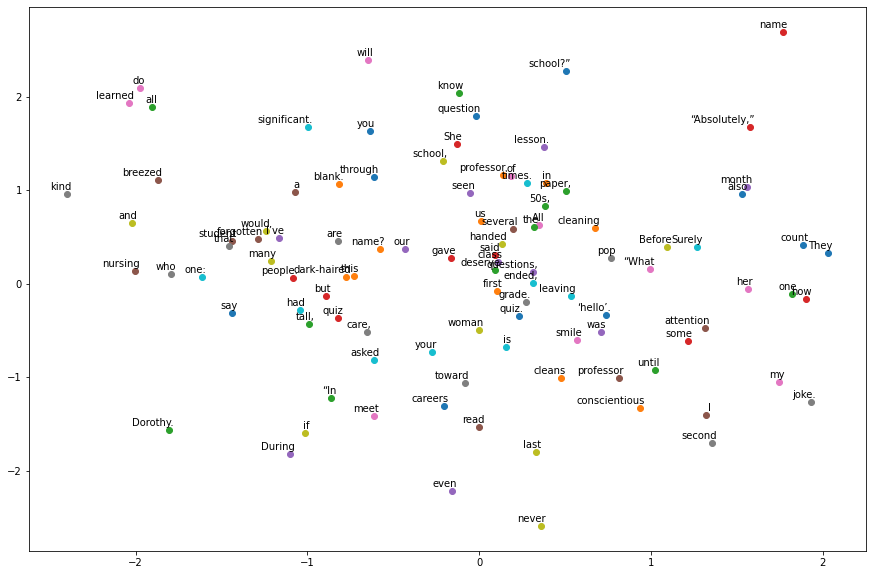

In [64]:
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    # print(x,y)
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [65]:
data[0]

(['During', 'my', 'month', 'of'], 'second')

In [70]:
def CBOW_test(test_data, model):
    correct_ct = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)  
        model.zero_grad()
        predicted = torch.argmax(model(context_vector), 1)
        # print(model(context_vector),predicted)
        if predicted[0] == torch.tensor([word_to_ix[target]]):
                correct_ct += 1
        
    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

In [71]:
CBOW_test(data, model)

Accuracy: 100.0% (138/138)


In [75]:
#TESTING
context = ["During" ,"my","month" ,'of']
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)

In [76]:
print(torch.argmax(a[0]))

tensor(27)


In [77]:
#Print result
print(f'Raw text: {" ".join(raw_text)}\n')
print(f'Context: {context}\n')
print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')

Raw text: During my second month of nursing school, our professor gave us a pop quiz. I was a conscientious student and had breezed through the questions, until I read the last one: “What is the first name of the woman who cleans the school?” Surely this was some kind of joke. I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name? I handed in my paper, leaving the last question blank. Before class ended, one student asked if the last question would count toward our quiz grade. “Absolutely,” said the professor. “In your careers you will meet many people. All are significant. They deserve your attention and care, even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy.

Context: ['During', 'my', 'month', 'of']

Prediction: second


#### SkipGram

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

In [44]:
def random_batch(skip_grams):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), 2, replace=False)
    print(random_index)
    for i in random_index:
        random_inputs.append(skip_grams[i][0])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels

In [45]:
sentences = """During my second month of nursing school, our professor gave us a pop quiz.  
I was a conscientious student and had breezed through the questions, until I read the last one: 
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.""".split()

In [46]:
embedding_size = 10 

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

voc_size = len(word_list)

In [47]:
def skipgram(sentences, window_size=1):
    skip_grams = []
    for i in range(window_size, len(word_sequence) - window_size):
        target = word_sequence[i]
        context = [word_sequence[i - window_size], word_sequence[i + window_size]]
        for w in context:
            skip_grams.append([target, w])

    return skip_grams

In [48]:
skipgram(word_sequence)[0]

['my', 'During']

In [49]:
random_batch(skipgram(word_sequence))

[48 21]


(['until', 'a'], ['questions,', 'pop'])

In [15]:
class skipgramModel(nn.Module):
    def __init__(self):
        super(skipgramModel, self).__init__()
        self.embedding = nn.Embedding(voc_size, embedding_size)
        self.W = nn.Linear(embedding_size, 512, bias=False) 
        self.WT = nn.Linear(512, voc_size, bias=False)

    def forward(self, X):
        embeddings = self.embedding(X)
        hidden_layer = nn.functional.relu(self.W(embeddings))
        output_layer = self.WT(hidden_layer)
        return output_layer

    def get_word_emdedding(self, word):
        word = torch.tensor([word_dict[word]])
        return self.embedding(word).view(1,-1)

In [16]:
model = skipgramModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [17]:
model

skipgramModel(
  (embedding): Embedding(41, 10)
  (W): Linear(in_features=10, out_features=512, bias=False)
  (WT): Linear(in_features=512, out_features=41, bias=False)
)

In [28]:
for epoch in tqdm(range(1), total=len(skipgram(word_sequence))):
    input_batch, target_batch = random_batch(skipgram(word_sequence))
    # print(input_batch,target_batch)
    input_batch = [word_dict[input_batch] for n1 in input_batch]
    input_batch = torch.LongTensor(input_batch)
    target_batch = [word_dict[n1] for n1 in target_batch]
    target_batch = torch.LongTensor(target_batch)
    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 10000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward(retain_graph=True)
    optimizer.step()

  1%|          | 1/96 [00:00<00:00, 97.40it/s]

tensor([35, 25])


In [23]:
def Skipgram_test(test_data, model):
    correct_ct = 0

    for i in range(len(test_data)):
        input_batch, target_batch = random_batch(test_data)
        input_batch = [word_dict[n1] for n1 in input_batch]
        input_batch = torch.LongTensor(input_batch)
        target_batch = [word_dict[n1] for n1 in target_batch]
        target_batch = torch.LongTensor(target_batch)

        model.zero_grad()
        predicted = torch.argmax(model(input_batch), 1)

        if predicted[0] == target_batch[0]:
                correct_ct += 1

    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

In [24]:
Skipgram_test(skipgram(word_sequence), model)

Accuracy: 32.3% (31/96)


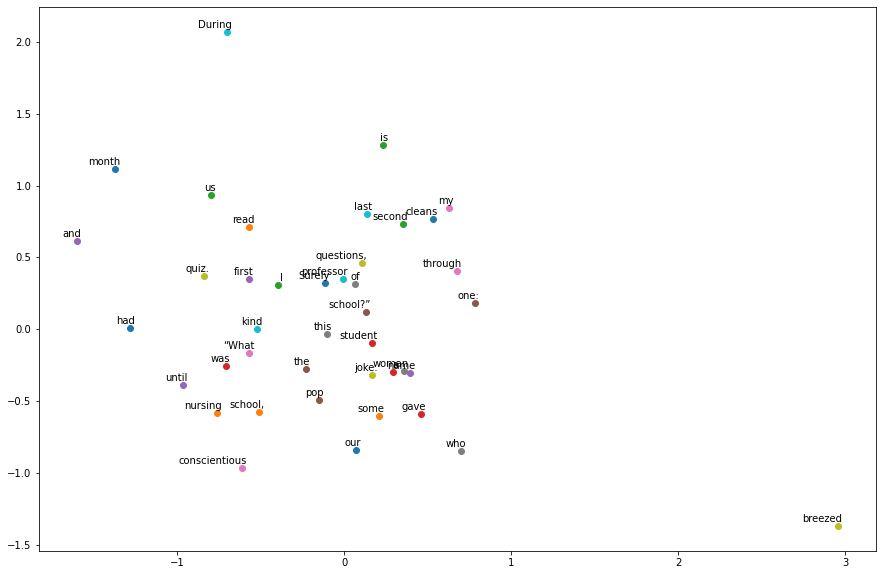

In [25]:
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [26]:
pred = "Surely".split()

In [27]:
word_dict_inverse = {i:w for w, i in word_dict.items()}


In [44]:
model_pred = []
e = 0
model_pred.append(pred[0])

while e<6:
    word = word_dict_inverse[torch.argmax(model(torch.LongTensor([word_dict[model_pred[-1]]]))).item()]
    model_pred.append(word)
    e+=1

' '.join(model_pred)

'Surely this Surely this Surely this Surely'